In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
class Obstaculo():
    def __init__(self, limxMax, limxMin ,limyMax, limyMin):
        self.limites = [limxMax, limxMin ,limyMax, limyMin]

    def in_collision(self, x, y):
        if self.limites[0]>= x >= self.limites[1] and self.limites[2]>= y >= self.limites[3]:
            return True
        return False

class Obstaculo_circulo():
    def __init__(self, centerx, centery, radius):
        self.center = [centerx, centery]
        self.radius = radius
    
    def in_collision(self, x, y):
        d = np.sqrt((x-self.center[0])**2 + (y-self.center[1])**2)
        if d <= self.radius:
            return True
        return False
    


In [5]:
obst1 = Obstaculo(5, -5, 15, 8)

#obst1.in_collision(2,10)
obst1.in_collision(0,0)

#obstCircle = Obstaculo_circulo(2,2,5)#centro en 2,2 y con un radio de 5
#obstCircle.in_collision(8,5)

False

In [6]:
visitados=[]
por_visitar=[]
limx = [-20,20]
limy = [-20,20]
class Nodo():
    
    def __init__(self, pos=[0,0], papa=None):
        self.pos = pos
        self.hijos=[]
        self.papa = papa
        self.h = 0
        if papa:
            self.costo= papa.costo +1
        else: 
            self.costo = 0
        #self.costo = costo + 1
        
    def genera_hijos(self, obstaculos):
        
        pos_arriba = [self.pos[0], self.pos[1]+1] #movemos y+1
        
        pos_der = [self.pos[0]+1, self.pos[1]] #movemos x+1
        
        pos_abajo = [self.pos[0], self.pos[1]-1] #movemos y-1
        
        pos_izq = [self.pos[0]-1, self.pos[1]] #movemos x-1
        
        if pos_arriba[1] < limy[1]:# pos_arriba[y] debe ser menor que límite superior y
            se_puede = True
            for ob in obstaculos:
                if (ob.in_collision(pos_arriba[0], pos_arriba[1])):
                    se_puede = False
                    break
            if se_puede:
                self.hijos.append(Nodo(pos_arriba,self))
        if pos_der[0] < limx[1]:# pos_der[x] debe ser menor que límite superior x
            se_puede = True
            for ob in obstaculos:
                if (ob.in_collision(pos_der[0], pos_der[1])):
                    se_puede = False
                    break
            if se_puede:
                self.hijos.append(Nodo(pos_der,self))
        if limy[0] < pos_abajo[1]: #pos_abajo[y] debe ser mayor que límite inferior y
            se_puede = True
            for ob in obstaculos:
                if (ob.in_collision(pos_abajo[0], pos_abajo[1])):
                    se_puede = False
                    break
            if se_puede:
                self.hijos.append(Nodo(pos_abajo,self))
        if limx[0]< pos_izq[0]: #pos_izq[x] debe ser mayor que límite inferior x   
            se_puede = True
            for ob in obstaculos:
                if (ob.in_collision(pos_izq[0], pos_izq[1])):
                    se_puede = False
                    break
            if se_puede:
                self.hijos.append(Nodo(pos_izq,self))
    
    def bpp(self, goalpos, obstaculos): #búsqueda primero en profundidad
        if self.pos in visitados:
            return None
        if self.pos == goalpos:
            return [self] # si lo encontramos entonces vamos a regresar una lista con el último
        self.genera_hijos(obstaculos)
        visitados.append(self.pos)       
        for hijo in self.hijos:
            tray = hijo.bpp(goalpos, obstaculos)
            if tray!= None:
                tray.append(self)
                return tray
        return None

    def bpa(self, goalpos, obstaculos):
        if self in visitados:
            return None
        if self.pos == goalpos:
            return [self] # si lo encontramos entonces vamos a regresar una lista con el último      
        self.genera_hijos(obstaculos)
        visitados.append(self)
        por_visitar = self.hijos.copy()
        #for hijo in por_visitar:
        while por_visitar != []:
            hijo = por_visitar.pop(0)
            if not hijo in visitados:                
                if hijo.pos == goalpos:
                    #return [self]
                    trayectoria = [hijo]
                    padre = hijo.papa
                    while padre:
                        trayectoria.append(padre)
                        padre = padre.papa
                    return trayectoria
                hijo.genera_hijos(obstaculos)
                por_visitar = por_visitar + hijo.hijos.copy()
                visitados.append(hijo) 
        return []

    def heuristica(self, goalpos): # esta es la función h(n)
        self.h = np.sqrt((goalpos[0] - self.pos[0])**2 + (goalpos[1] - self.pos[1])**2)
        return self.h
        
    def f_n(self, goalpos):
        self.f = self.costo + self.heuristica(goalpos) 
        return self.f 
        
    def a_estrella(self, goalpos, obstaculos):
        vistados = []
        por_visitar = [self]
        while por_visitar != []:
            hijo = por_visitar.pop(0)
            if not hijo in visitados:                
                if hijo.pos == goalpos:
                    #return [self]
                    trayectoria = [hijo]
                    padre = hijo.papa
                    while padre:
                        trayectoria.append(padre)
                        padre = padre.papa
                    return trayectoria
                hijo.genera_hijos(obstaculos)
                for nieto in hijo.hijos:
                    nieto.f_n(goalpos)
                por_visitar = por_visitar + hijo.hijos.copy()
                por_visitar = sorted(por_visitar, key = lambda node:node.f)
                visitados.append(hijo) 
        return []  
    
    def greedy(self, goalpos, obstaculos):
        vistados = []
        por_visitar = [self]
        while por_visitar != []:
            hijo = por_visitar.pop(0)
            if not hijo in visitados:                
                if hijo.pos == goalpos:
                    #return [self]
                    trayectoria = [hijo]
                    padre = hijo.papa
                    while padre:
                        trayectoria.append(padre)
                        padre = padre.papa
                    return trayectoria
                hijo.genera_hijos(obstaculos)
                for nieto in hijo.hijos:
                    nieto.heuristica(goalpos)
                por_visitar = por_visitar + hijo.hijos.copy()
                por_visitar.sort()
                visitados.append(hijo) 
        return []  
    
    def to_list(self):
        list_of_nodes = [self]
        for h in self.hijos:
            list_of_nodes = list_of_nodes + h.to_list()
        return list_of_nodes
    
    def __repr__(self):
        return str(f"x:{self.pos[0]},y:{self.pos[1]}")

    def __eq__(self, elotro):
        if self is not None and elotro is not None:
            if self.pos == elotro.pos:
                return True
            else:
                return False
    #nodo1 < nodo2
    def __lt__(self, elotro):
        return self.h < elotro.h
            

In [62]:
class Robot():
    def __init__(self, dof, numb=1):
        self.dof = dof
        self.model = None
        self.num_bodies = numb
        self.global_position = [0,0]
        self.trajectory = []
        self.espacio_estados = []
        self.obstaculos = []
        
    def add_obstacle(self, limxMax, limxMin ,limyMax, limyMin):
        self.obstaculos.append(Obstaculo(limxMax, limxMin ,limyMax, limyMin))
        
    def add_circle_obstacle(self, centerx, centery,rad):
        self.obstaculos.append(Obstaculo_circulo(centerx, centery, rad))

    def get_obst_circle(self):
        for obs in self.obstaculos:
            if isinstance(obs, Obstaculo_circulo):
                return plt.Circle(obs.center, obs.radius, fill=False)
                
    def draw_obstacles(self, canvas):
        for obs in self.obstaculos:
            if isinstance(obs, Obstaculo_circulo):
                obscirc= plt.Circle(obs.center, obs.radius, fill=False)
                canvas.add_artist(obscirc)
            else:
                #print("cuadrado")
                canvas.plot(
                    [obs.limites[1], obs.limites[0], obs.limites[0], obs.limites[1], obs.limites[1]],
                    [obs.limites[3], obs.limites[3], obs.limites[2], obs.limites[2], obs.limites[3]],
                    color = 'red'
                )
                
    def draw_generated_nodes(self, canvas):
        if self.raiz != None:
            for nodo in self.raiz.to_list():
                canvas.scatter(x=nodo.pos[0], y=nodo.pos[1], marker = '*' , color='blue')
        else:
            print("Calcular la Trayectoria primero")
    
    def draw_trajectory (self, canvas):
        lasx = []
        lasy = []
        for estado in self.trajectory:
            x,y =estado.pos    
            lasx.append(x)
            lasy.append(y)
        if lasx!=[]:
            canvas.scatter(x=lasx[0],y=lasy[0])
            canvas.scatter(x=lasx[1:],y=lasy[1:])
        canvas.scatter(x=self.raiz.pos[0],y=self.raiz.pos[1], marker="^", color="yellow")
        
    def plot_all(self):
        fig, ax = plt.subplots()
        ax.set_xlim(-20,20)
        ax.set_ylim(-20,20)
        self.draw_generated_nodes(ax)
        
        ax.plot(
            [limx[0], limx[1], limx[1], limx[0], limx[0]],
            [limy[1], limy[1], limy[0], limy[0], limy[1]],
            color = 'purple'
        )
        
        ax.set_aspect(1)
        self.draw_trajectory(ax)
        self.draw_obstacles(ax)      
    
    def move(self, pos):
        #self.trajectory.append(self.global_position.copy()) # o también self.global_position[:]
        for x in range(pos[0]+1):
            self.global_position[0] = x 
            self.trajectory.append(self.global_position.copy())
        for y in range(pos[1]+1):
            self.global_position[1] = y
            self.trajectory.append(self.global_position.copy())

    def busca_camino_goal(self, goalpos, search_mode="bpp"):
        self.raiz = Nodo(self.global_position)
        if search_mode == "bpp":
            self.trajectory = self.raiz.bpp(goalpos, self.obstaculos)
        elif search_mode == "bpa":
            self.trajectory = self.raiz.bpa(goalpos, self.obstaculos)
        elif search_mode == "greedy":
            self.trajectory = self.raiz.greedy(goalpos, self.obstaculos)
        elif search_mode == "A*":
            self.trajectory = self.raiz.a_estrella(goalpos, self.obstaculos)
        return self.trajectory
            
    def get_occupancy_grid(self):
        grid = {}
        grid2 = np.zeros((40,40))
        for x in range(limx[0],limx[1]):
            for y in range (limy[0],limy[1]):  
                grid[str(x)+","+str(y)] = 0
                
                for obs in self.obstaculos:
                    if obs.in_collision(x,y):
                        print(x,y)
                        grid[str(x)+","+str(y)] = 1   
                        grid2[x+20,y+20] = 1
        return grid, grid2

    def draw_occupancy_grid(self):
        fig, ax = plt.subplots()
        ax.set_xlim(-20,20)
        ax.set_ylim(-20,20)
        ax.plot(
            [limx[0], limx[1], limx[1], limx[0], limx[0]],
            [limy[1], limy[1], limy[0], limy[0], limy[1]],
            color = 'purple'
        )
        for x in range(limx[0],limx[1]):
            for y in range(limx[0], limy[1]):
                if (grid[str(x)+","+str(y)]):
                    plt.scatter(x=x,y=y, c="black")
        
    def next_positions(self):
        mi_pos = Nodo(self.global_position)
        mi_pos.genera_hijos()
        tray= [mi_pos.pos,mi_pos.hijos[0].pos,mi_pos.hijos[1].pos,mi_pos.hijos[2].pos,mi_pos.hijos[3].pos]
        return tray
            
robot1 = Robot(6)
robot2 = Robot(3,3)


In [63]:
visitados=[]
robot1 = Robot(6)
#print(robot1.dof)
#tray = robot1.next_positions()
robot1.add_obstacle(5, -5, 15, 8)
robot1.add_circle_obstacle(10,0,5)
tray = robot1.busca_camino_goal([12,10])
#print(tray)
lasx = []
lasy = []
for estado in tray:
    x,y =estado.pos    
    lasx.append(x)
    lasy.append(y)


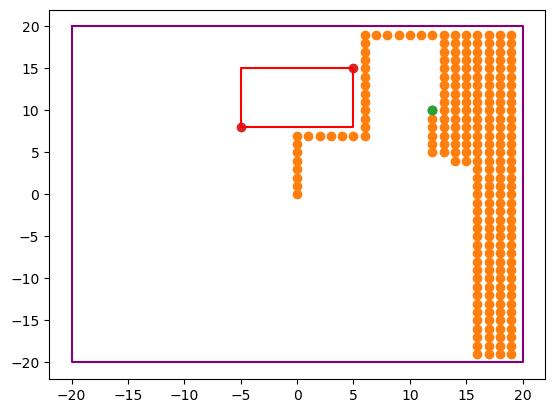

In [64]:
lasx
plt.scatter(x=lasx[0],y=lasy[0])
plt.scatter(x=lasx[1:],y=lasy[1:])
plt.scatter(x=12,y=10)
plt.plot(
    [limx[0], limx[1], limx[1], limx[0], limx[0]],
    [limy[1], limy[1], limy[0], limy[0], limy[1]],
    color = 'purple'
)
plt.scatter(x=obst1.limites[:2], y=obst1.limites[2:])
plt.plot(
    [obst1.limites[1], obst1.limites[0], obst1.limites[0], obst1.limites[1], obst1.limites[1]],
    [obst1.limites[3], obst1.limites[3], obst1.limites[2], obst1.limites[2], obst1.limites[3]],
    color = 'red'
)



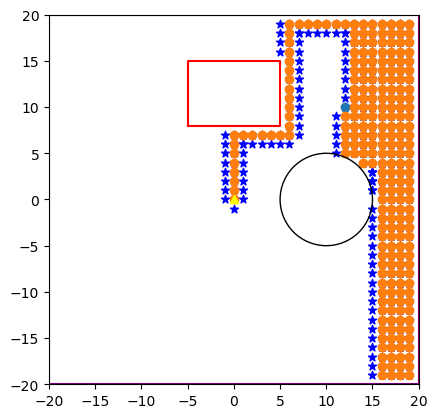

In [28]:
#obstCircle = Obstaculo_circulo(10,0,5)#centro en 2,2 y con un radio de 5


fig, ax = plt.subplots()
#elcirculo = robot1.get_obst_circle()
#elciculo = plt.Circle(obstCircle.center, obstCircle.radius, fill=False)
#elciculo = plt.Circle((.2,.2), .3)

ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
robot1.draw_generated_nodes(ax)

ax.plot(
    [limx[0], limx[1], limx[1], limx[0], limx[0]],
    [limy[1], limy[1], limy[0], limy[0], limy[1]],
    color = 'purple'
)
#ax.scatter(x=obst1.limites[:2], y=obst1.limites[2:])
#ax.plot(
#    [obst1.limites[1], obst1.limites[0], obst1.limites[0], obst1.limites[1], obst1.limites[1]],
#    [obst1.limites[3], obst1.limites[3], obst1.limites[2], obst1.limites[2], obst1.limites[3]],
#    color = 'red'
#)

ax.set_aspect(1)
robot1.draw_trajectory(ax)
robot1.draw_obstacles(ax)

#ax.add_artist(elcirculo)

In [74]:
visitados =[]
por_visitar=[]
tray = robot1.busca_camino_goal([12,10], "bpa")

cuadrado


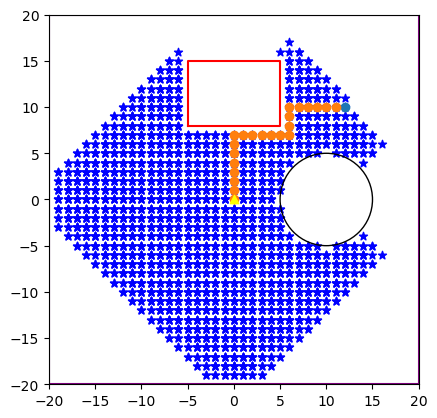

In [75]:
fig, ax = plt.subplots()
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
robot1.draw_generated_nodes(ax)
ax.plot(
    [limx[0], limx[1], limx[1], limx[0], limx[0]],
    [limy[1], limy[1], limy[0], limy[0], limy[1]],
    color = 'purple'
)
ax.set_aspect(1)
robot1.draw_trajectory(ax)
robot1.draw_obstacles(ax)


In [72]:
robot1.add_obstacle(5, -5, 15, 8)
robot1.add_circle_obstacle(10,0,5)
tray = robot1.busca_camino_goal([12,10], "greedy")

cuadrado


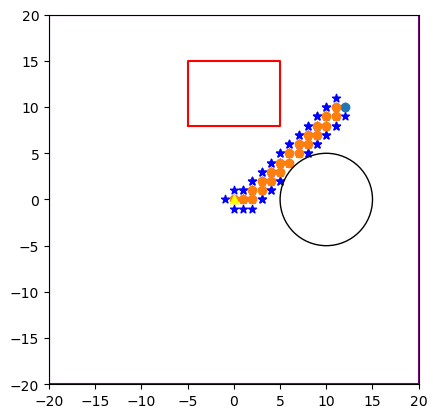

In [73]:
fig, ax = plt.subplots()
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
robot1.draw_generated_nodes(ax)
ax.plot(
    [limx[0], limx[1], limx[1], limx[0], limx[0]],
    [limy[1], limy[1], limy[0], limy[0], limy[1]],
    color = 'purple'
)
ax.set_aspect(1)
robot1.draw_trajectory(ax)
robot1.draw_obstacles(ax)

In [22]:
visitados =[]
por_visitar=[]
tray = robot1.busca_camino_goal([12,10], "A*")


cuadrado


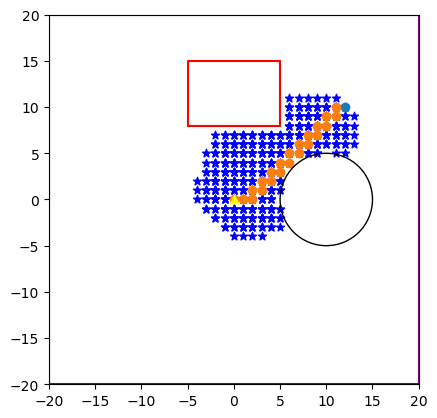

In [23]:
robot1.plot_all()

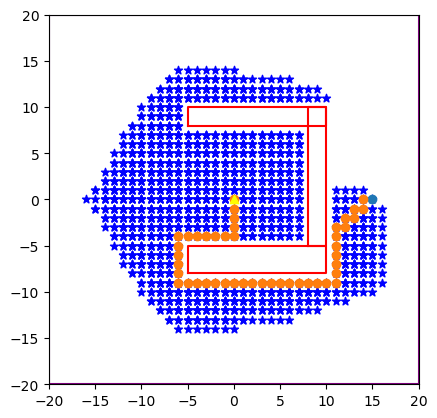

In [49]:
visitados = []
por_visitar = []
robot2 = Robot(6)
robot2.add_obstacle(10, -5, 10, 8)
robot2.add_obstacle(10, -5, -5, -8)
robot2.add_obstacle(10, 8, 10, -5)
#robot2.add_circle_obstacle(10,0,5)
tray = robot2.busca_camino_goal([15,0], "A*")
robot2.plot_all()

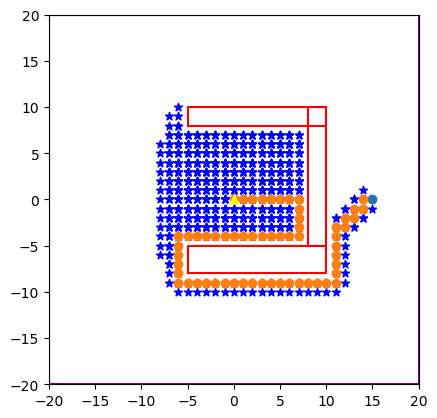

In [50]:
visitados = []
por_visitar = []
robot2 = Robot(6)
robot2.add_obstacle(10, -5, 10, 8)
robot2.add_obstacle(10, -5, -5, -8)
robot2.add_obstacle(10, 8, 10, -5)
#robot2.add_circle_obstacle(10,0,5)
tray = robot2.busca_camino_goal([15,0], "greedy")
robot2.plot_all()

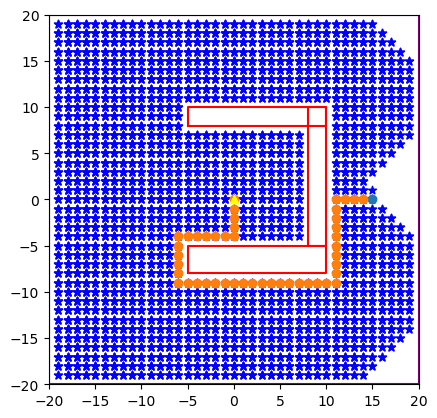

In [51]:
visitados = []
por_visitar = []
robot2 = Robot(6)
robot2.add_obstacle(10, -5, 10, 8)
robot2.add_obstacle(10, -5, -5, -8)
robot2.add_obstacle(10, 8, 10, -5)
#robot2.add_circle_obstacle(10,0,5)
tray = robot2.busca_camino_goal([15,0], "bpa")
robot2.plot_all()